In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import inception_v3
from tensorflow.keras.preprocessing import image as Image
from DeepDream import DeepDream

In [2]:
model = inception_v3.InceptionV3(weights="imagenet", include_top=False)

In [3]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [4]:
def preprocess_image(image_path):
    image = Image.load_img(image_path)
    image = Image.img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = inception_v3.preprocess_input(image)
    return image

def deprocess_image(x):
    x = x.reshape((x.shape[1], x.shape[2], 3))
    x /= 2.0
    x += 0.5
    x *= 255.0
    x = np.clip(x, 0, 255).astype("uint8")
    return x

In [6]:
image_path = "./images/02.jpg"
image = preprocess_image(image_path)

# Weights to define how much result deep dream will dependent on which layers
layer_contributions = {"mixed2": 0.2,
                       "mixed3": 3.0,
                       "mixed4": 2.0,
                       "mixed5": 1.5}

deepdream = DeepDream(model, layer_contributions)
dream = deepdream.visualize(image)

/anaconda3/envs/dev/lib/python3.7/site-packages/scipy/ndimage/interpolation.py:611: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


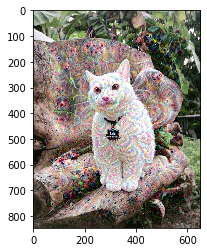

In [33]:
image = deprocess_image(np.copy(dream))
plt.imshow(image)